In [1]:
import torch
import gradio as gr 
from model_arch import CNN
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm
from datasets import load_dataset

/home/yosh/gradio-demo/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [90]:
dataset = load_dataset("ylecun/mnist")

preprocess = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0,), (1,))  
])

def preprocess_ops(examples):
    examples['image'] = [preprocess(image) for image in examples['image']]
    return examples

dataset.set_transform(preprocess_ops)
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})


In [91]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [92]:
params = {
    'n_filters': 30,
    'hidden_dim': 100,
    'n_layers': 2
}
model = CNN(**params)
model.load_state_dict(torch.load('mnist_model.pth'))
model.eval()

CNN(
  (conv1): Conv2d(1, 30, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(30, 60, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (inp_layer): Linear(in_features=960, out_features=100, bias=True)
  (classifier): ModuleList(
    (0-1): 2 x Sequential(
      (0): Linear(in_features=100, out_features=100, bias=True)
      (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.3, inplace=False)
    )
  )
  (out_layer): Linear(in_features=100, out_features=10, bias=True)
)

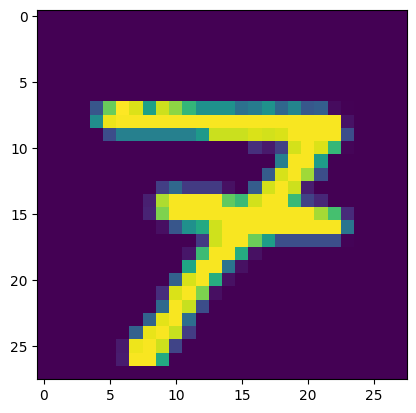

In [93]:
# test
idx = torch.randint(0, 100, (1,))
img, label = test_dataset['image'][idx], test_dataset['image'][idx]
plot_img = img[0].permute(1,2,0)
plt.imshow(plot_img)

In [94]:
img[0].max(), img[0].min()

(tensor(1.), tensor(0.))

In [80]:
# a = train_dataset['image'][idx]
# a[0].unsqueeze(0).shape

In [81]:
# img[0].shape

In [82]:
# testLoader = DataLoader(test_dataset, 2)
# for batch in testLoader:
#     img, label = batch['image'], batch['label']
#     print(img.shape)
#     out = model(img)
#     break

In [83]:
with torch.no_grad():
    sketch = img[0].unsqueeze(0)
    out = model(sketch)
    pred = out.argmax()
    print(f'out {out} pred {pred}')

out tensor([[-7.0962, -4.6868, -4.4560, 12.5355, -8.3207, -1.2968, -7.2319, -2.4834,
         -5.4369, -2.8795]]) pred 3
